              precision    recall  f1-score   support

           0       0.75      0.81      0.78       387
           1       0.38      0.33      0.35        82
           2       0.11      0.05      0.07        19
           3       0.65      0.60      0.62       168

    accuracy                           0.68       656
   macro avg       0.47      0.45      0.46       656
weighted avg       0.66      0.68      0.66       656

Accuracy: 67.53%


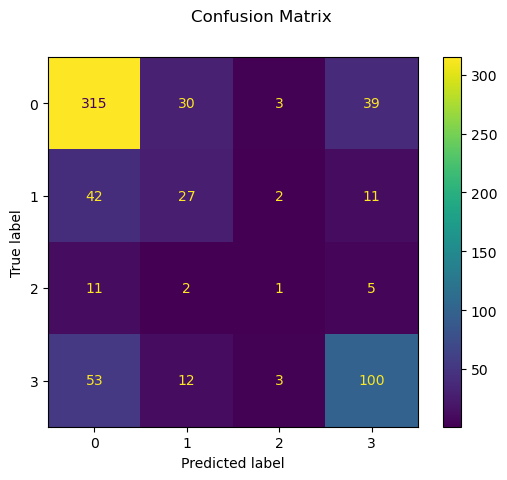

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from elpv_dataset.utils.elpv_reader import load_dataset
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Load dataset
images, proba, types = load_dataset()
index = np.arange(images.shape[0])
np.random.shuffle(index)
images = images[index]
proba = proba[index]
types = types[index]

# Splitting the dataset into training and testing sets
train_images, test_images, train_proba, test_proba, train_types, test_types = train_test_split(
    images, proba, types, test_size=0.25, random_state=42)


# Function to compute HOG features for each image
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Assuming image is grayscale, if not convert it to grayscale
        if image.ndim > 2 and image.shape[2] == 3:
            image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        fd = hog(image, orientations=8, pixels_per_cell=(16, 16),
                 cells_per_block=(1, 1), channel_axis=None, block_norm='L2-Hys') # remove channel_axis if converted to grayscale
        hog_features.append(fd)
    return np.array(hog_features)


# Compute HOG features
train_hog_features = extract_hog_features(train_images)
test_hog_features = extract_hog_features(test_images)

# Train the SVM model
svm_model = svm.SVC(kernel='linear', probability=True)
svm_model.fit(train_hog_features, np.multiply(train_proba, 3))

# Make predictions on the test set
svm_pred = svm_model.predict(test_hog_features)

# Calculate the accuracy
accuracy = accuracy_score(np.multiply(test_proba, 3).astype(int), svm_pred.astype(int))

# Print classification report
print(classification_report(np.multiply(test_proba, 3).astype(int), svm_pred.astype(int)))

# Print the accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')

# Show confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(np.multiply(test_proba, 3).astype(int), svm_pred.astype(int))
disp.figure_.suptitle("Confusion Matrix")
plt.show()



Monocrystalline Cells Accuracy: 69.47%
              precision    recall  f1-score   support

           0       0.74      0.85      0.80       150
           1       0.39      0.46      0.42        24
           2       0.17      0.11      0.13         9
           3       0.75      0.53      0.62        79

    accuracy                           0.69       262
   macro avg       0.51      0.49      0.49       262
weighted avg       0.69      0.69      0.69       262



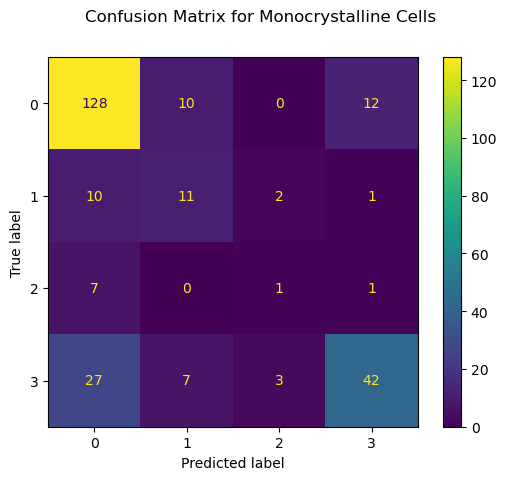


Polycrystalline Cells Accuracy: 66.24%
              precision    recall  f1-score   support

           0       0.75      0.79      0.77       237
           1       0.37      0.28      0.32        58
           2       0.00      0.00      0.00        10
           3       0.59      0.65      0.62        89

    accuracy                           0.66       394
   macro avg       0.43      0.43      0.43       394
weighted avg       0.64      0.66      0.65       394



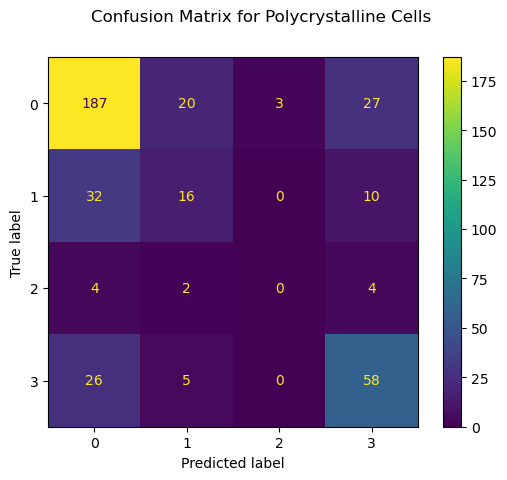

In [2]:
# MONO CELLS ONLY
mono_mask = test_types == 'mono'
mono_pred = svm_model.predict(test_hog_features[mono_mask])
mono_accuracy = accuracy_score(np.multiply(test_proba[mono_mask], 3).astype(int), mono_pred)
print(f'\nMonocrystalline Cells Accuracy: {mono_accuracy * 100:.2f}%')
print(classification_report(np.multiply(test_proba[mono_mask], 3).astype(int), mono_pred))
disp = ConfusionMatrixDisplay.from_predictions(np.multiply(test_proba[mono_mask], 3).astype(int), mono_pred)
disp.figure_.suptitle("Confusion Matrix for Monocrystalline Cells")
plt.show()

# POLY CELLS ONLY
poly_mask = test_types == 'poly'
poly_pred = svm_model.predict(test_hog_features[poly_mask])
poly_accuracy = accuracy_score(np.multiply(test_proba[poly_mask], 3).astype(int), poly_pred)
print(f'\nPolycrystalline Cells Accuracy: {poly_accuracy * 100:.2f}%')
print(classification_report(np.multiply(test_proba[poly_mask], 3).astype(int), poly_pred))
disp = ConfusionMatrixDisplay.from_predictions(np.multiply(test_proba[poly_mask], 3).astype(int), poly_pred)
disp.figure_.suptitle("Confusion Matrix for Polycrystalline Cells")
plt.show()